Qu'est ce que le clustering ?


Le clustering est une technique d'analyse de données en marchine learning supervisé ou non supervisé

Est ce un problème difficile  ? pourquoi ? Donnez la complexité en temps et mémoire


cela peut être un problème difficile si il y a beaucoup de données et ou beaucoup de labels

Quelle sont les métriques utilisés pour le clustering ?

on peut utiliser le silhouette score, l'indice de Davies-Bouldin, l'index de Dunn, l'indice de rand, l'indice de rand ajusté, la mesure de pureté, l'inertie, l'index de Calinski-Harabasz, l'homogénéité, la complétude et la V-measure

Écrivez en une phrase votre compréhension pour 3 métrique avec ground truth (dont MNI) 3 sans ground truth (dont silhouette)

les indices avec ground truth utilisent ce dernier pour voir si on est proche de la vérité ou non.
MNI prend en compte à la fois l'homogénéité (similitude intra-cluster) et la séparation (dissimilarité inter-cluster) des clusters par rapport au ground truth.


les indices sans ground truth se basent sur la proximité des points dans les clusters et la séparation entre les clusters

différence entre NMI et AMI et silhouette ?

NMI utilise ground truth pour pour mesurer la quantité d'information par rapport à ce dernier.
AMI est comme NMI mais tient compte du hasard.

Silhouette score n'utilise pas ground truth il mesure la similaritée des points d'un cluster par rapport aux autres clusters.

Run a clustering algorithm on the digits/mnist dataset to cluster the numbers.

Temps écoulé : 1.18 secondes


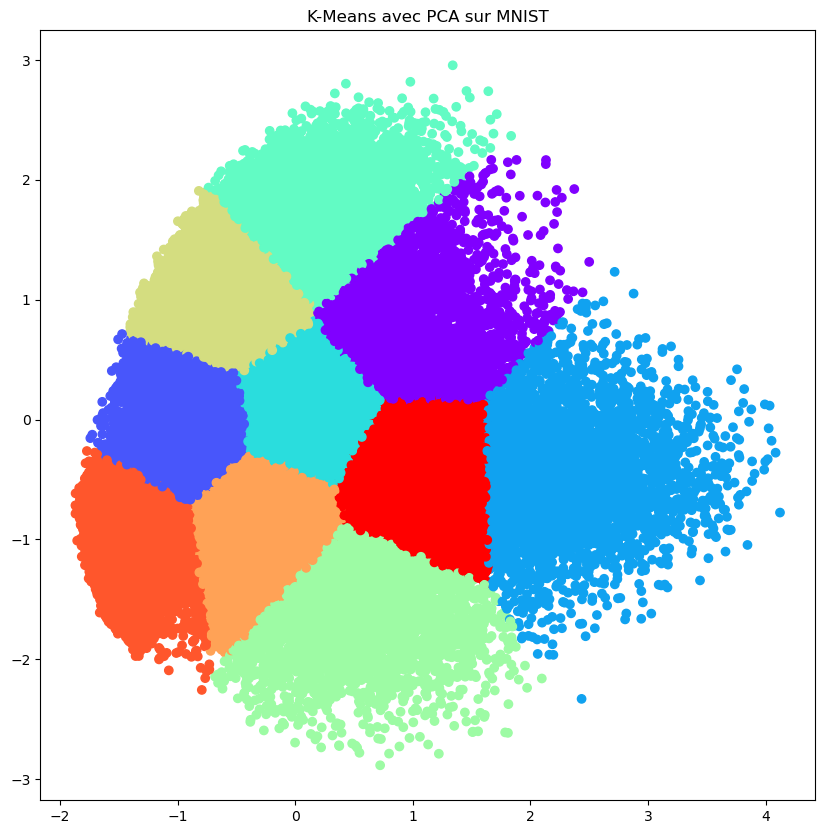

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import time

# Charger le dataset mninst_784
mnist = datasets.fetch_openml("mnist_784", parser='auto')
X = mnist.data

# Reduction de dimension avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# StandardScaler sur les data reduite
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# KMeans
start_time = time.time()

kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)
kmeans.fit(X_scaled)

end_time = time.time()
elapsed_time = end_time - start_time

print("Temps écoulé : {:.2f} secondes".format(elapsed_time))

# Visualisation 2D
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title("K-Means avec PCA sur MNIST")
plt.show()

In [3]:
# Inertie
inertie = kmeans.inertia_

# Silhouette
silhouette = silhouette_score(X_scaled, kmeans.labels_)

# Indice de Davies-Bouldin
davies_bouldin = davies_bouldin_score(X_scaled, kmeans.labels_)

# Affiche les scores
print(f"Inertie: {inertie}")
print(f"Silhouette Score: {silhouette}")
print(f"Indice de Davies-Bouldin: {davies_bouldin}")

Inertie: 15749.559933106886
Silhouette Score: 0.35655607861648336
Indice de Davies-Bouldin: 0.8116509451359775


l'inertie doit être faible pour être bonne (faible par rapport à quoi ?)

le silhouette score doit être proche de 1 pour être parfait (de -1 à 1)

l'indice de davies bouldin doit être bas pour être bon

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time

Temps écoulé : 472.37 secondes


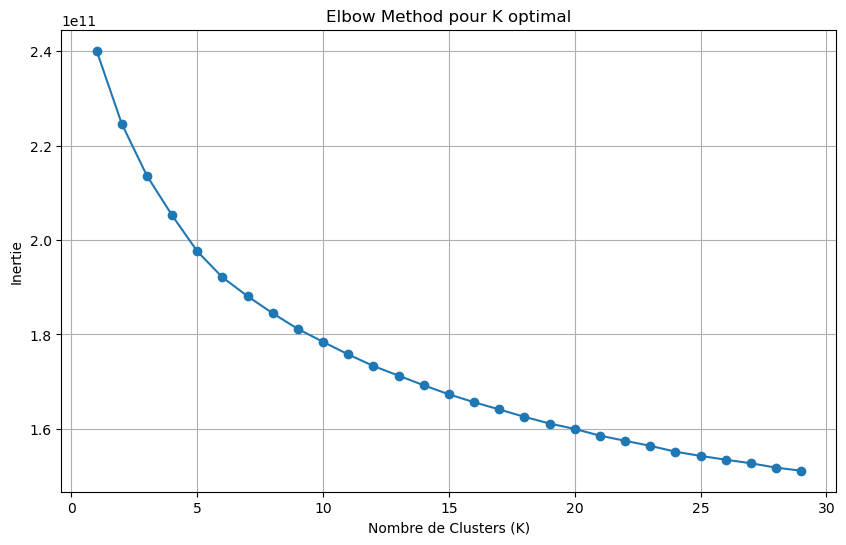

In [8]:
mnist = fetch_openml("mnist_784", parser='auto')
X = (mnist.data)

inertias = []

start_time = time.time()

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

end_time = time.time()
elapsed_time = end_time - start_time

print("Temps écoulé : {:.2f} secondes".format(elapsed_time))
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), inertias, marker='o', linestyle='-')
plt.title('Elbow Method pour K optimal')
plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('Inertie')
plt.grid(True)
plt.show()